# Plots and Figures of AGN FP CARMA Data

## Table of Contents

### Introduction and Imports

### Chapter 1: DRW Terms

> #### 1.1 Terms vs. Lbol

> #### 1.2 tau vs. amp

### Chapter 2: DHO Timescales Fit

> #### 2.1 log_Lbol vs timescales

> #### 2.2 log_Mbh vs timescales

> #### 2.3 log_Lbol vs z[OIII]_x

> #### 2.4 xi vs omega_0

### Chapter 3: Timescales vs. Timescales

> #### 3.1 c_ax = log_Lbol

> #### 3.2 c_ax = log_Mbh

> #### 3.3 c_ax = z[OIII]_x

### Chapter 4: Timescales vs. DHO Terms

> #### 4.1 c_ax = log_Lbol

> #### 4.2 c_ax = log_Mbh

> #### 4.3 c_ax = z[OIII]_x

> #### 4.4 c_ax = SNR

> #### 4.5 c_ax = log_Eratio

> #### 4.6 Fig. 3 and Fig. 10

### Appendix 

> #### A: Functions

## Introduction and Imports

### Filter Type

Specifies the filter used from the forced photometry data. 

**This line is required in order to run most cells in this workbook.** The filter type is used when accessing, saving, and parsing dataframes and files

In [1]:
filter_type = 'g'

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import corner
import matplotlib.pyplot as plt

In [3]:
agn_dataframe = pd.read_parquet('AGN_FP_g_MasterDF.parquet')
agn_dataframe

,Filenames,RA,DEC,field,Times (JD),Magnitudes,Mag Errors,Best DRW Fit,Best DRW ARMA Fit,DRW chisq,...,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0,oscillation,good timescale fit,tau_decay fit,tau_rise_dqpo fit,tau_decorr fit
0,fp_lc_0.20323455_-7.1532089_field_395.csv,0.2,-7.2,395,"[2458283.9428935, 2458318.918287, 2458322.9398...","[22.075839486275363, 21.24175510232971, 23.134...","[0.9112273425746468, 0.3438406481866066, 1.602...","[1.010050167084168, 462.7140829227677]","[0.3715581744238082, 5.952544522958926e+282]",0.000000e+00,...,138.891895,0.013578,0.957120,0.021328,462.750987,underdamped,True,ontime,ontime,ontime
1,fp_lc_0.8642925999999999_27.654793_field_1645.csv,0.9,27.7,1645,"[2458314.9841204, 2458314.9845718, 2458337.903...","[21.776049719004373, 22.69602698749315, 27.083...","[0.4399298523147267, 1.1095079097321627, 43.46...","[1.010050167084168, 27.109266853184746]","[0.3715581744238082, 3.690339017728185e+16]",6.835069e-24,...,179.517221,0.021953,19572.042705,0.034484,286.206372,underdamped,True,ontime,ontime,ontime
2,fp_lc_0.8642925999999999_27.654793_field_600.csv,0.9,27.7,600,"[2458263.9847338, 2458289.9331134, 2458295.950...","[23.81327311535296, 22.15362923336867, 22.3145...","[12.396324456863823, 0.5551943587070858, 1.398...","[1.010050167084168, 2.7281744639746646]","[0.3715581744238082, 46.47796681309023]",7.387091e-01,...,13975.421342,0.385809,108.917408,21953.146538,0.013619,overdamped,False,overtime,ontime,overtime
3,fp_lc_1.0082763_70.3217215_field_1880.csv,1.0,70.3,1880,"[2458387.7687616, 2458390.9042245, 2458443.747...","[22.514904553587147, 23.036754506803423, 22.70...","[1.8071456097826883, 3.0001561743848435, 2.814...","[1.010050167084168, 22026.465794806718]","[0.3715581744238082, inf]",0.000000e+00,...,16844.407817,27.349987,4757.167718,42.961257,0.229733,underdamped,False,overtime,ontime,ontime
4,fp_lc_1.0082763_70.3217215_field_833.csv,1.0,70.3,833,"[2458246.9853009, 2458252.967963, 2458258.9859...","[21.56465887440168, 22.33818025318398, 23.7592...","[0.6526396260172993, 0.8128131225566738, 7.155...","[1.010050167084168, 1858.4849889987731]","[0.3715581744238082, inf]",0.000000e+00,...,55213.329293,42.174170,551.783958,86795.141875,0.000655,overdamped,False,overtime,ontime,overtime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,fp_lc_90.658166_65.3713197_field_1845.csv,90.7,65.4,1845,"[2458747.0154861, 2458747.0159375, 2458749.987...","[21.01370656765534, 20.29993978770297, 20.8846...","[0.354977227605443, 0.1838833746256927, 0.2794...","[1.010050167084168, 1.0100501670841682]","[0.3715581744238082, 4.142511876711822]",1.136832e+01,...,3085.073074,2.985716,0.007528,4.689951,2.104415,underdamped,False,overtime,ontime,ontime
510,fp_lc_90.658166_65.3713197_field_812.csv,90.7,65.4,812,"[2458210.7471412, 2458227.6813194, 2458231.703...","[18.431935844236552, 21.339635020904225, 21.45...","[0.090329115198733, 0.5138602848328698, 0.8363...","[1.010050167084168, 34.93058739196199]","[0.3715581744238082, 2.2225237840927835e+21]",1.382318e-24,...,1996.068064,0.001944,2.158783,3135.419437,0.507687,overdamped,False,ontime,ontime,overtime
511,fp_lc_93.9014798_71.03749785_field_838.csv,93.9,71.0,838,"[2458237.6971065, 2458341.0046065, 2458346.987...","[19.97050336003658, 17.993713800570976, 19.023...","[0.3954985249581671, 0.0688176983721745, 0.059...","[2.147428690254264, 1.010050167084168]","[0.6277123840057082, 2.650536169864579]",1.705648e+02,...,7.084623,0.002585,0.194371,11.132561,7.388886,overdamped,True,ontime,ontime,ontime
512,fp_lc_98.19657765_63.6736939_field_1845.csv,98.2,63.7,1845,"[2458384.9114699, 2458427.8838426, 2458430.837...","[22.969026888219453, 19.99405330758357, 19.101...","[3.136789926126838, 0.1451415501118745, 0.0424...","[1.010050167084168, 27.49213242264915]","[0.3715581744238082, 6.324756260348977e+16]",2.248466e-23,...,27.581204,0.015358,9.164867,0.024125,409.104413,underdamped,True,ontime,ontime,ontime


### SNR, LC Length, and log Lbol

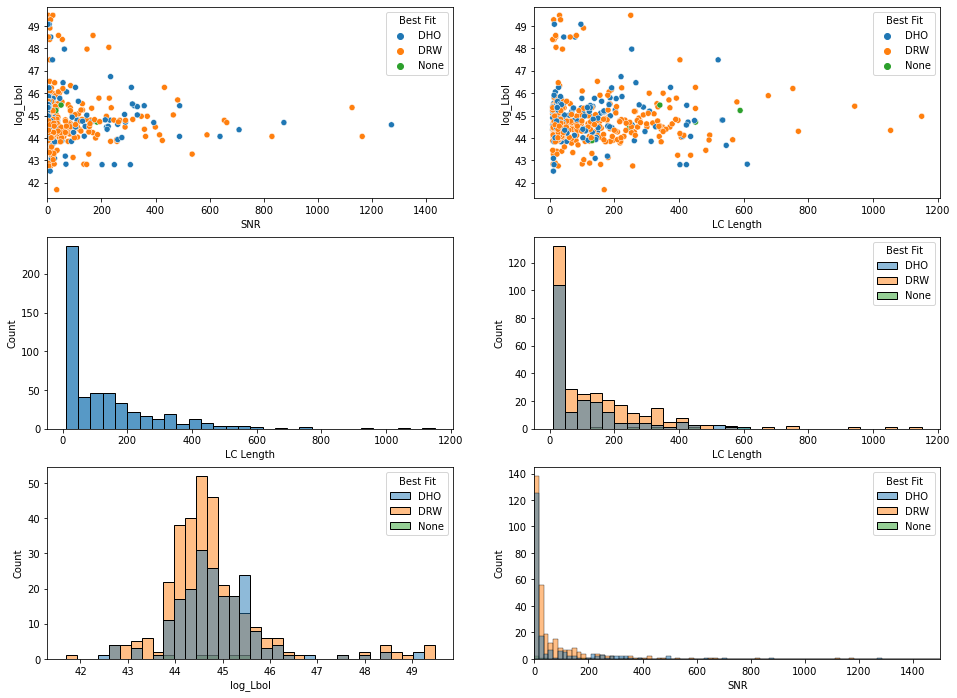

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

row = 0
# SNR vs log LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# LC Length vs log LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])
# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of log LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])
# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 

plt.savefig(f'FP_{filter_type}_SNR_LCLength_Lbol.png')
plt.show()

- - -
- - -

## Chapter 1: DRW Terms

### 1.1 Terms vs. Lbol

In [10]:
# Since DRW terms are saved as a numpy array, a new df needs to be created where
# each of the terms are in their own column in order to be plotted with matplotlib

taus = []
amps = []
Lbols = []
good_timescale_fits = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = row['Best DRW ARMA Fit']
    Lbol = row['log_Lbol']
    good_timescale_fit = row['good timescale fit']
    
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)
    good_timescale_fits.append(good_timescale_fit)

drw_data = pd.DataFrame({'tau': taus, 'amp': amps, 'log_Lbol': Lbols, 'good timescale fit': good_timescale_fits})

C:\Users\Caleb\anaconda3\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


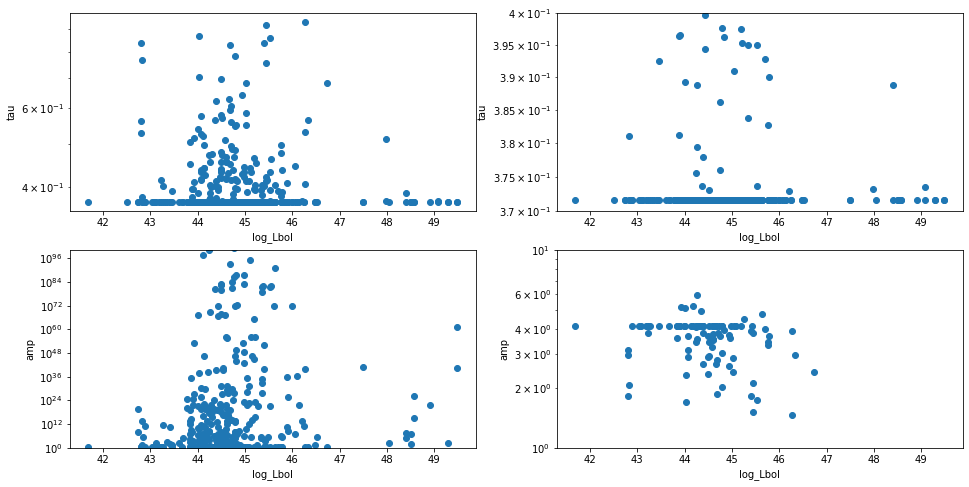

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

row = 0
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 0
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(3.7e-1,4e-1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 1
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e100)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

row = 1
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

plt.savefig(f'FP_{filter_type}_DRW.png')
plt.show()

### 1.2 tau vs. amp

C:\Users\Caleb\anaconda3\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


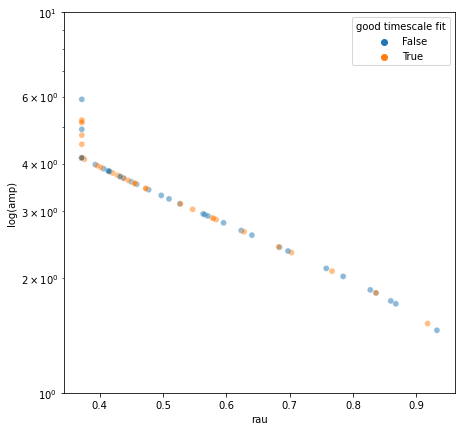

In [20]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=drw_data, x='tau', y='amp', hue='good timescale fit', alpha=0.5)

# does not make a difference between # and not #
# ax.set_xscale('log')

ax.set_yscale('log')
ax.set_xlabel('rau')
ax.set_ylabel('log(amp)')

plt.savefig(f'FP_{filter_type}_tau_vs_amp.png')

- - -
- - -

## Chapter 2: DHO Timescales Fit

In [15]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

### 2.1 log_Lbol vs timescales

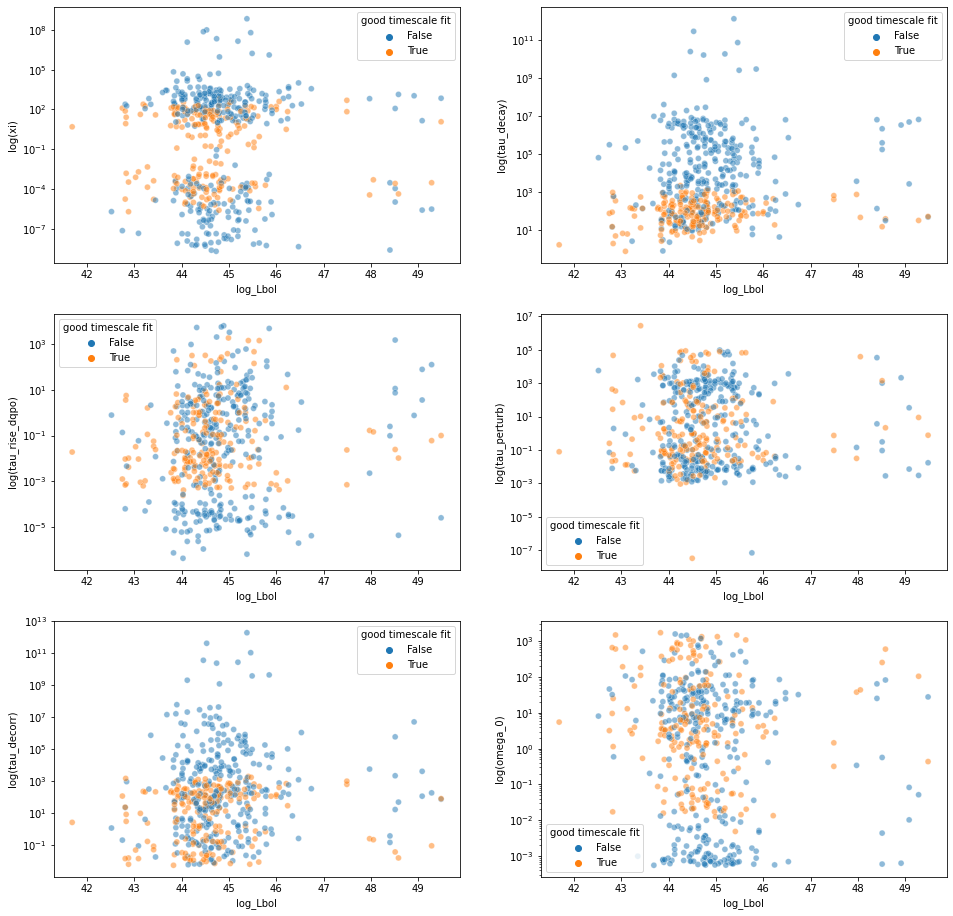

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Lbol'

# xi
row = 0
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='xi', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decay', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_perturb', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decorr', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='omega_0', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_timescales_Lbol.png')

### 2.2 log_Mbh vs timescales

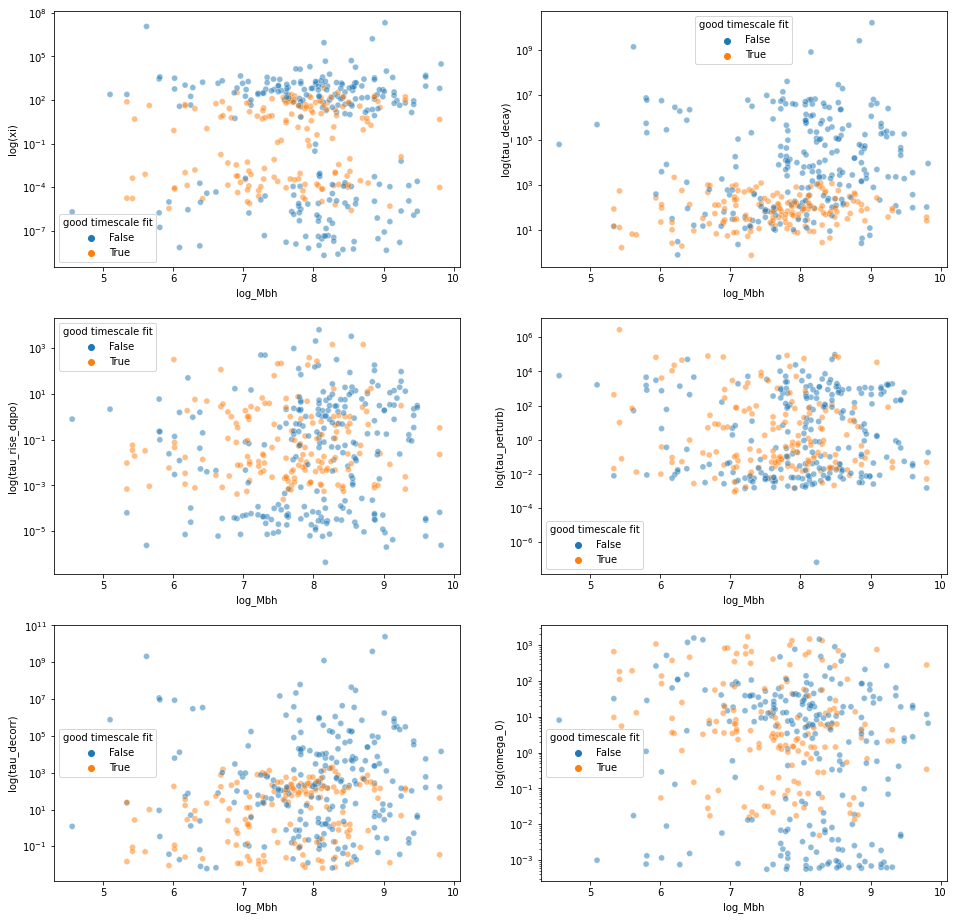

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Mbh'

# xi
row = 0
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='xi', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decay', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_perturb', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
sns.scatterplot(data=agn_dataframe, x=x_ax, y='tau_decorr', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
sns.scatterplot(data=agn_dataframe, x=x_ax, y='omega_0', hue='good timescale fit', alpha=0.5, ax=axs[row, col])
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_timescales_Mbh.png')

### 2.3 log_Lbol vs z[OIII]_x

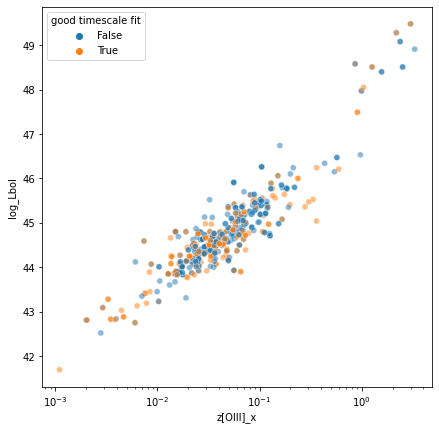

In [23]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=agn_dataframe, x='z[OIII]_x', y='log_Lbol', hue='good timescale fit', alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('z[OIII]_x')
ax.set_ylabel('log_Lbol')

plt.savefig(f'FP_{filter_type}_z[OIII]_x_Lbol.png')

### 2.4 xi vs omega_0

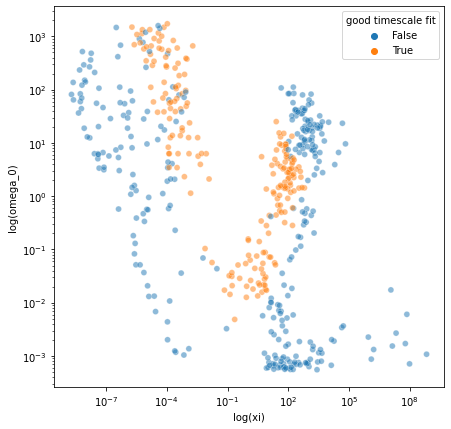

In [24]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=agn_dataframe, x='xi', y='omega_0', hue='good timescale fit', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(xi)')
ax.set_ylabel('log(omega_0)')

plt.savefig(f'FP_{filter_type}_xi_vs_omega0.png')

- - -
- - -

## Chapter 3: Timescales vs. Timescales

In [3]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

### 3.1 c_ax = log_Lbol

In [ ]:
x_ax = 'log_Lbol'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}_timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

### 3.2 c_ax = log_Mbh

In [ ]:
x_ax = 'log_Mbh'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}__timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

### 3.3 c_ax = z[OIII]_x

In [ ]:
x_ax = 'z[OIII]_x'

timescale_color_plot(agn_dataframe, 'xi', x_ax, f'FP_{filter_type}_timescales_xi_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decay', x_ax, f'FP_{filter_type}_timescales_tau_decay_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_rise_dqpo', x_ax, f'FP_{filter_type}_timescales_tau_rise_dqpo_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_perturb', x_ax, f'FP_{filter_type}_timescales_tau_perturb_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'tau_decorr', x_ax, f'FP_{filter_type}_timescales_tau_decorr_{x_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(agn_dataframe, 'omega_0', x_ax, f'FP_{filter_type}_timescales_omega_0_{x_ax}', log_x=True, log_c=True, alpha=0.5)

- - -
- - -

## Chapter 4: Timescales vs. DHO Terms

In [3]:
# exclude fits for which DHO_chi_sq is infinity
# agn_dataframe = agn_dataframe[agn_dataframe['DHO chisq'] != np.inf]

#### dho_fit_data

Create dataframe of DHO terms and relevant data for plots used in this chapter

In [31]:
a1s = []
a2s = [] 
b0s = []
b1s = []

for index, row in agn_dataframe.iterrows():
    dho_terms = row['DHO MCMC Fit']
    
    a1s.append(dho_terms[0])
    a2s.append(dho_terms[1])
    b0s.append(dho_terms[2])
    b1s.append(dho_terms[3])
    
dho_fit_data = pd.DataFrame({'BAT ID': agn_dataframe['BAT ID'], 'log_Lbol': agn_dataframe['log_Lbol'], 'log_Mbh': agn_dataframe['log_Mbh'],
                             'a1': a1s, 'a2': a2s, 'b0': b0s, 'b1': b1s,
                             'SNR': agn_dataframe['SNR'], 'z[OIII]_x': agn_dataframe['z[OIII]_x'], 'log_Eratio': agn_dataframe['log_Eratio'], 
                             'xi': agn_dataframe['xi'], 
                             'tau_decay': agn_dataframe['tau_decay'], 'tau_rise_dqpo': agn_dataframe['tau_rise_dqpo'], 'tau_perturb': agn_dataframe['tau_perturb'], 'tau_decorr': agn_dataframe['tau_decorr'], 
                             'omega_0': agn_dataframe['omega_0']})
dho_fit_data

,BAT ID,log_Lbol,log_Mbh,a1,a2,b0,b1,SNR,z[OIII]_x,log_Eratio,xi,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0
0,1.0,44.53,6.42,0.014400,2.141385e+05,0.109431,0.104739,1.731581,0.037484,0.00,0.000016,138.891895,0.013578,0.957120,0.021328,462.750987
1,4.0,44.58,7.85,0.011141,8.191409e+04,0.000005,0.093329,4.235321,0.039689,NaN,0.000019,179.517221,0.021953,19572.042705,0.034484,286.206372
2,4.0,44.58,7.85,2.592025,1.854651e-04,0.011430,1.244964,13.237393,0.039689,NaN,95.165170,13975.421342,0.385809,108.917408,21953.146538,0.013619
3,5.0,45.38,NaN,0.000119,5.277710e-02,0.000002,0.010376,4.085723,0.096416,NaN,0.000258,16844.407817,27.349987,4757.167718,42.961257,0.229733
4,5.0,45.38,NaN,0.023729,4.294469e-07,0.000100,0.055370,3.844852,0.096416,NaN,18.105074,55213.329293,42.174170,551.783958,86795.141875,0.000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,317.0,44.01,8.94,0.000648,4.428564e+00,0.071261,0.000536,17.549066,0.017491,NaN,0.000154,3085.073074,2.985716,0.007528,4.689951,2.104415
510,317.0,44.01,8.94,514.479163,2.577461e-01,5.639427,12.174300,14.143524,0.017491,NaN,506.689359,1996.068064,0.001944,2.158783,3135.419437,0.507687
511,325.0,44.66,6.80,386.930700,5.459564e+01,93.950310,18.261194,24.145848,0.013439,-0.25,26.183289,7.084623,0.002585,0.194371,11.132561,7.388886
512,337.0,44.53,7.61,0.072513,1.673664e+05,0.031068,0.284734,25.510240,0.040417,NaN,0.000089,27.581204,0.015358,9.164867,0.024125,409.104413


### 4.1 c_ax = log_Lbol

In [ ]:
c_ax = 'log_Lbol'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.2 c_ax = log_Mbh

In [ ]:
c_ax = 'log_Mbh'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.3 c_ax = z[OIII]_x

In [ ]:
c_ax = 'z[OIII]_x'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, log_c=True, alpha=0.5)

### 4.4 c_ax = SNR

In [ ]:
c_ax = 'SNR'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, log_c=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, log_c=True, alpha=0.5)

### 4.5 c_ax = log_Eratio

In [ ]:
c_ax = 'log_Eratio'
filter_type = 'g'

timescale_color_plot(dho_fit_data, 'a1', c_ax, f'FP_{filter_type}_timescales_loga1_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'a2', c_ax, f'FP_{filter_type}_timescales_loga2_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b0', c_ax, f'FP_{filter_type}_timescales_logb0_{c_ax}', log_x=True, alpha=0.5)
timescale_color_plot(dho_fit_data, 'b1', c_ax, f'FP_{filter_type}_timescales_logb1_{c_ax}', log_x=True, alpha=0.5)

### 4.6 Fig. 3 and Fig. 10

Remaking of figures 3 and 10 from *Examining AGN UV/optical Variability Beyond the Simple Damped Random Walk* by Weixiang Yu, et al. 

[source](https://arxiv.org/pdf/2201.08943.pdf)

#### Figure 3 (page 6)

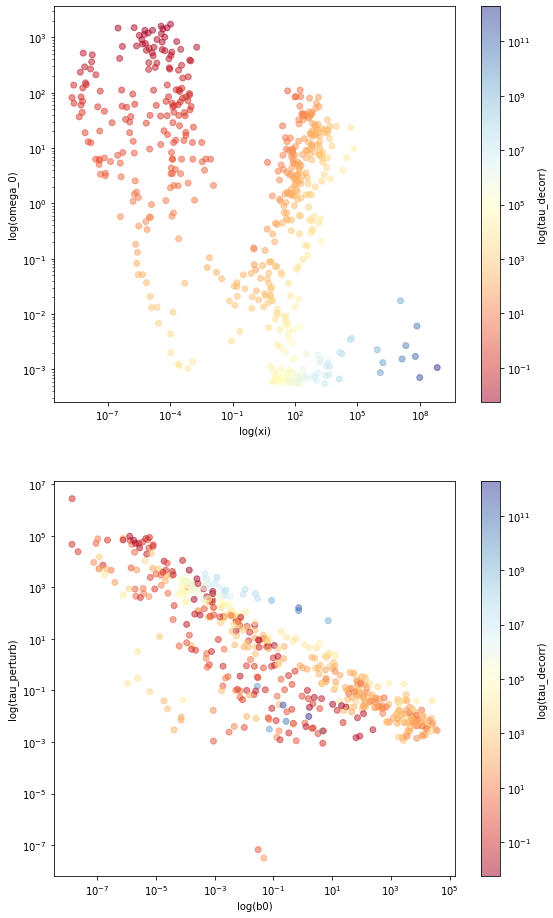

In [37]:
import matplotlib.colors as colors

fig, axs = plt.subplots(2, figsize=(9, 16))
cm = plt.cm.get_cmap('RdYlBu')
c_ax = 'tau_decorr'
alpha = 0.5

# xi
col = 0
sc = axs[col].scatter(data=dho_fit_data, x='xi', y='omega_0', c=c_ax, cmap=cm, norm=colors.LogNorm(), alpha=alpha)
cbar = fig.colorbar(sc, ax=axs[col])
cbar.set_label(f'log({c_ax})')
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('log(xi)')
axs[col].set_ylabel('log(omega_0)')

col = 1
sc = axs[col].scatter(data=dho_fit_data, x='b0', y='tau_perturb', c=c_ax, cmap=cm, norm=colors.LogNorm(), alpha=alpha)
cbar = fig.colorbar(sc, ax=axs[col])
cbar.set_label(f'log({c_ax})')
axs[col].set_xscale('log')
axs[col].set_yscale('log')
axs[col].set_xlabel('log(b0)')
axs[col].set_ylabel('log(tau_perturb)')

plt.savefig(f'FP_{filter_type}_figure_3.png')

#### Figure 10 (page 15)

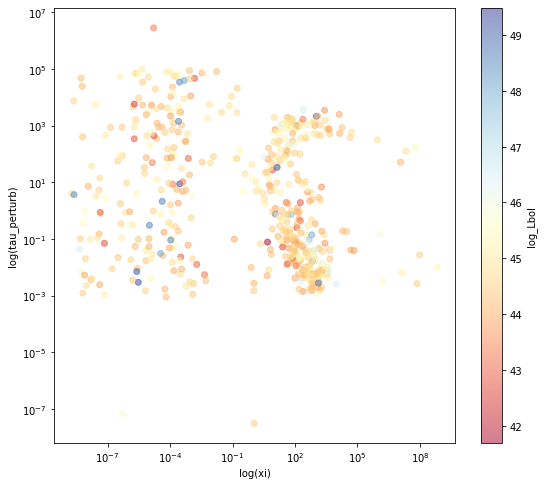

In [38]:
fig, ax = plt.subplots(figsize=(9, 8))
cm = plt.cm.get_cmap('RdYlBu')
c_ax = 'log_Lbol'
alpha = 0.5

sc = ax.scatter(data=dho_fit_data, x='xi', y='tau_perturb', c=c_ax, cmap=cm, alpha=alpha)
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(c_ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(xi)')
ax.set_ylabel('log(tau_perturb)')

plt.savefig(f'FP_{filter_type}_figure_10.png')

- - -
- - -

## Appendix A: Functions

Miscillaneous Functions that are useful or used multiple times throughout this workbook

#### timescale_color_plot()

In [25]:
import matplotlib.colors as colors
def timescale_color_plot(dataframe, x_ax, c_ax, name='', log_x=False, log_c=False, marker=[['o'], None], alpha=1):
    """Plot a given value against each timescale value and color code along a provided axis
    
    - dataframe: Pandas dataframe
    
    - x_ax: String key of dataframe colemn to plot on the x-axis
    
    - c_ax: String key of dataframe colemn to plot on the color bar
    
    - name: String the name of the figure that is saved (saved as .png)
    
    - log_x: Boolean of whether to plot the x-axis in logarithmic scale
    
    - log_c: Boolean of whether to plot the color bar in logarithmic scale
    
    - marker: List of a list of markers and the key of the dataframe colemn of discriminators
    
    - alpha: Float from 0.0 to 1.0 of the opacity of the points plotted
    
    """
    
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    c_scale = colors.LogNorm() if log_c else None
    
    # create new dataframe that separates data points based on given discriminator in marker[1]
    if marker[1] != None: 
        # throw error if len(marker[0]) > # of discriminators in marker[1]
    
    # xi
    row = 0
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='xi', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(xi)')

    # tau_decay
    row = 0
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decay', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decay)')

    # tau_rise_dqpo
    row = 1
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_rise_dqpo', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_rise_dqpo)')
    
    # tau_perturb
    row = 1
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_perturb', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_perturb)')

    # tau_decorr
    row = 2
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decorr', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decorr)')

    # omega_0
    row = 2
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='omega_0', c=c_ax, cmap=cm, norm=c_scale, alpha=alpha)
    cbar = fig.colorbar(sc, ax=axs[row, col])
    cbar.set_label(c_ax)
    if log_x:
        axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(omega_0)')
    
    if name != '':
        plt.savefig(f'{name}.png')